# Customer Churn Analysis

### Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

### Importing Required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

### let's Load the Dataset

In [2]:
df = pd.read_csv('Customer_Churn_Analysis.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7043, 21)

The Dataset has total 7043 rows and 21 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


All the Columns are of object type except MontlyCharges which is of float dtype and tenure which is of intezer type 

In [7]:
df.groupby('Churn')[['MonthlyCharges', 'tenure']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure               
                 min     max       mean    min max       mean
Churn                                                        
No             18.25  118.75  61.265124      0  72  37.569965
Yes            18.85  118.35  74.441332      1  72  17.979133

TotalCharge is numeric column. however, it is showing as object type. this may be because there are some non-numeric values in this column. So let's convert non-numeric columns to nan values in TotalCharges column.

In [8]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [10]:
df['TotalCharges'].isna().sum()

11

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now the TotalCharges column is float type but it is showing 11 null values which were empty values before.

In [12]:
#Changing data type from object to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [13]:
df['TotalCharges'].dtypes

dtype('float64')

#### Let's Check the Null Values

In [14]:
df.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure                TotalCharges  \
                 min     max       mean    min max       mean          min   
Churn                                                                        
No             18.25  118.75  61.265124      0  72  37.569965        18.80   
Yes            18.85  118.35  74.441332      1  72  17.979133        18.85   

                             
           max         mean  
Churn                        
No     8672.45  2555.344141  
Yes    8684.80  1531.796094

we have 11 missing values in Total Charges and who are 0.016% of the overall data. We can either fill them, or remove them. 11 is a low number, so I will drop them.

In [16]:
df.dropna(inplace = True)

In [17]:
# Now check if NaN values (formerly empty values) are present
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.shape

(7032, 21)

Number of rows reduced to 7032 from 7043

### Statistical Summary

In [19]:
# For all numerical variables
df.describe() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Key Observations:

Senior citizen is actually a Categorical column, hence the 25%-50%-75% distribution is not proper.

75% of customers have tenure less than 55 months.

Average monthly charges are USD 64.79 where as 25% customers pay more than USD 89.26.

The mean is more than median(50th percentile) in tenure and TotalChages.wherever Mean value is higher than the median value, that data is skewed data. Also they have huge variance in their data in TotalCharges.

Also there is a large difference between 75% and max value in these two columns.

The 1 and 2 observations suggest that there are extreme outliers present in TotalCharges and tenure.

In [20]:
# For all categorical variables
df.select_dtypes(include="object").describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


The customer is approximately equally divided into male and female

In [21]:
# Droping Customerid column as it will not have any affect in predictions
df.drop("customerID",axis =1, inplace = True)

## Data Visualization

In [22]:
# checking the value of each categorical columns
def value_count(x):
    for i in categorical_col.columns:
        print(i,"\n",categorical_col[i].value_counts(),"\n")

In [23]:
categorical_col = df.select_dtypes(include = "object")
value_count(categorical_col)

gender 
 Male      3549
Female    3483
Name: gender, dtype: int64 

Partner 
 No     3639
Yes    3393
Name: Partner, dtype: int64 

Dependents 
 No     4933
Yes    2099
Name: Dependents, dtype: int64 

PhoneService 
 Yes    6352
No      680
Name: PhoneService, dtype: int64 

MultipleLines 
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

InternetService 
 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

OnlineSecurity 
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

OnlineBackup 
 No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

DeviceProtection 
 No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64 

TechSupport 
 No                     3472
Yes                    20

### Univariate Analysis

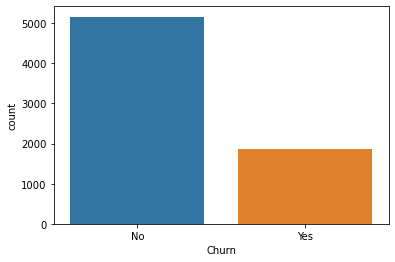

No     5163
Yes    1869
Name: Churn, dtype: int64


In [24]:
plt.figure(figsize=(6,4))
sns.countplot(df['Churn'])
plt.show()
print(df['Churn'].value_counts())

In [25]:
# Checking percentage of churnfor both the categories.
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

Here we can see that out of 7032 people, 1869 people are churn customer which is around 26.5% and 5163 are Existing customer which is 73.46% of total.

Data is highly imbalanced. ratio= 73:26 So the data is imbalanced. So we will apply SMOTE analysis before ML of final model.

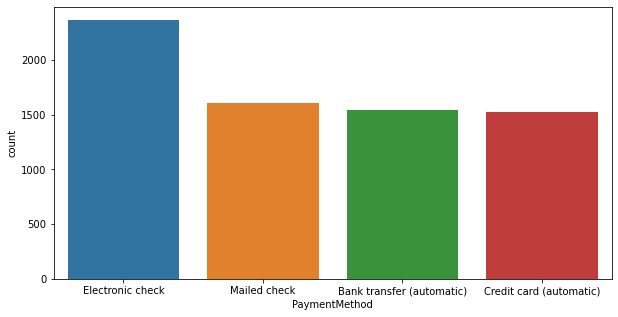

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['PaymentMethod'])
plt.show()
print(df['PaymentMethod'].value_counts())

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

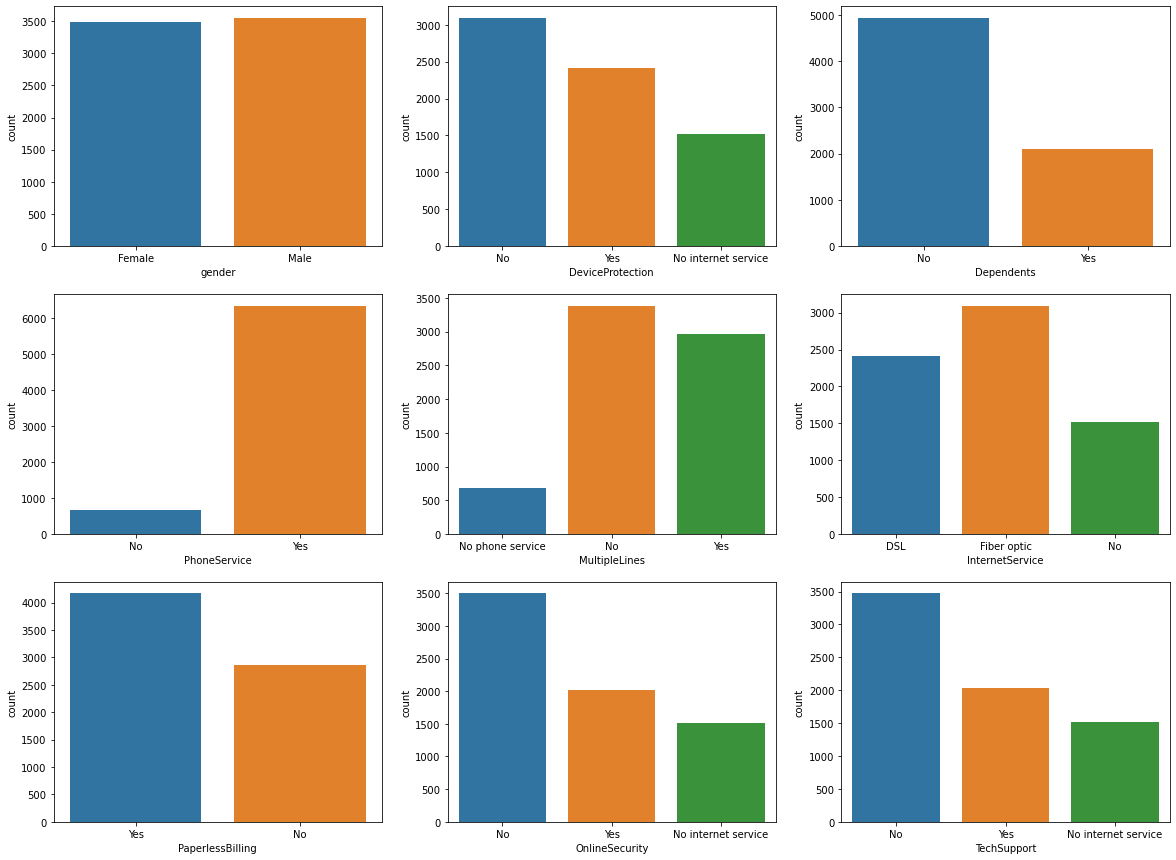

In [27]:
fig,ax=plt.subplots(3,3,figsize=(20,15))
sns.countplot('gender',data=df,ax=ax[0][0])
sns.countplot('DeviceProtection',data=df,ax=ax[0][1])
sns.countplot('Dependents',data=df,ax=ax[0][2])
sns.countplot('PhoneService',data=df,ax=ax[1][0])
sns.countplot('MultipleLines',data=df,ax=ax[1][1])
sns.countplot('InternetService',data=df,ax=ax[1][2])
sns.countplot('PaperlessBilling',data=df,ax=ax[2][0])
sns.countplot('OnlineSecurity',data=df,ax=ax[2][1])
sns.countplot('TechSupport',data=df,ax=ax[2][2])

Male members and female members are almost same.

Majority of the customers dont have device protection.

Only around half of the customers have a partner, and only about a third of the overall customers have dependents.

Most of the customers uses paperless billing.

Most of the users dont get online security and tech support

### let's analyse the numerical columns

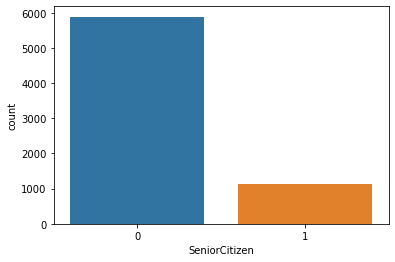

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


In [28]:
# Age distribution
plt.figure(figsize=(6,4))
sns.countplot(df['SeniorCitizen'])
plt.show()
print(df['SeniorCitizen'].value_counts())

In [29]:
charges = ['tenure', 'MonthlyCharges', 'TotalCharges']

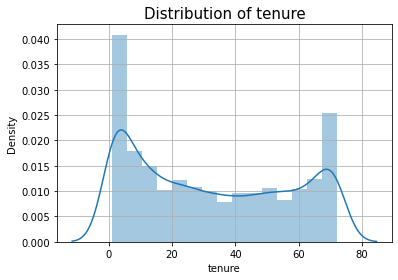

In [30]:
plt.rcParams["figure.figsize"] =(6,4)
sns.distplot(df["tenure"])
plt.title("Distribution of tenure", fontsize=15)
plt.grid()
plt.show()

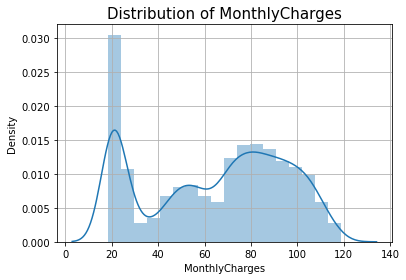

In [31]:
plt.rcParams["figure.figsize"] =(6,4)
sns.distplot(df["MonthlyCharges"])
plt.title("Distribution of MonthlyCharges", fontsize=15)
plt.grid()
plt.show()

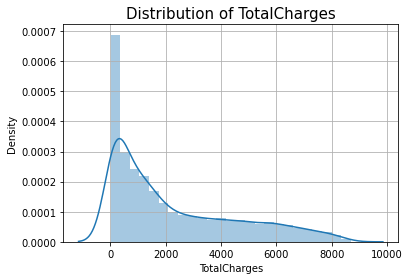

In [32]:
plt.rcParams["figure.figsize"] =(6,4)
sns.distplot(df["TotalCharges"])
plt.title("Distribution of TotalCharges", fontsize=15)
plt.grid()
plt.show()

Tenure distribution skewed, with most density at 10-15 and 60-70.

TotalCharge density most dense at 0-1000 and tend to lower as the TotalCharges higher. lets see how the distribution vary for 'Churn' and 'Not Churn'

MonthlyCharges distribution also skewed, with most density at 20-25.

In [33]:
num_col = df.select_dtypes(exclude = "object")

In [34]:
# Checking skewness in the numerical columns
num_col.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [35]:
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

In [36]:
df["TotalCharges"].skew()

0.012818570057014016

Skewness has been corrected,

## Exploratory Data Analysis

In [37]:
df.groupby(["gender","Churn"])["Churn"].count()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='TotalCharges'>

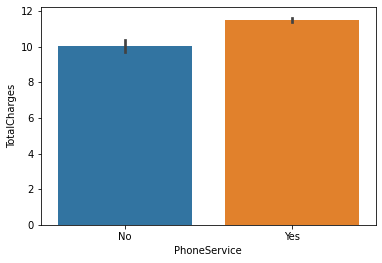

In [38]:
sns.barplot(x="PhoneService", y = "TotalCharges", data = df)

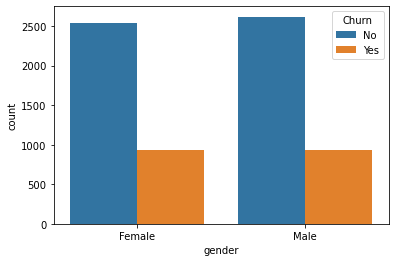

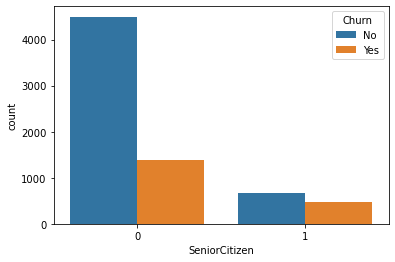

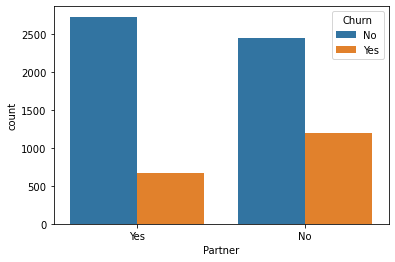

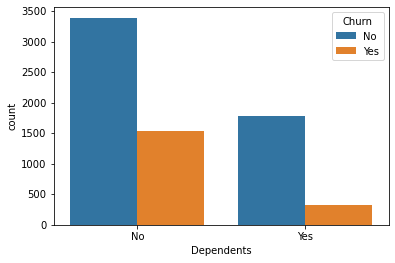

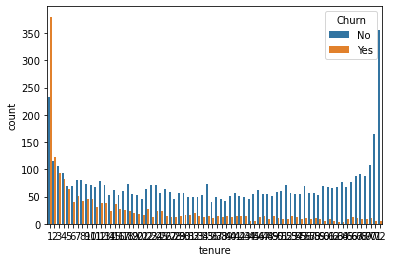

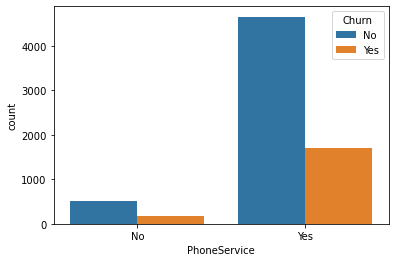

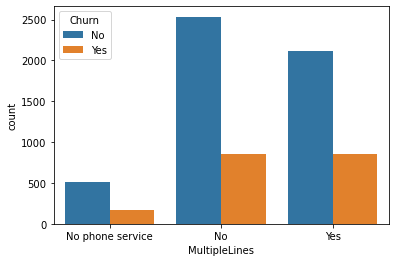

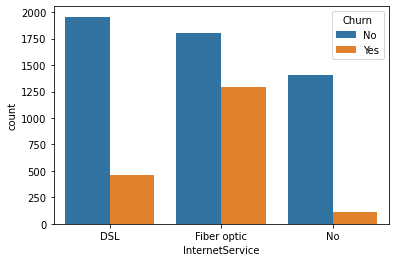

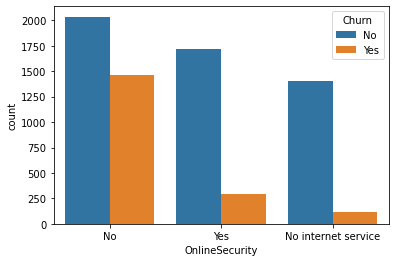

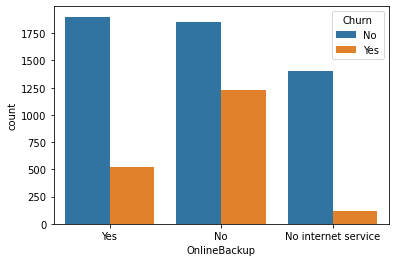

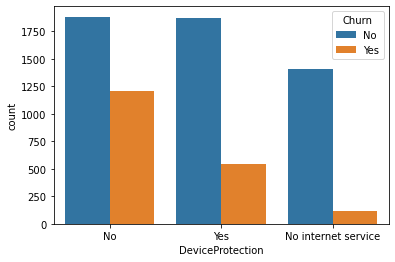

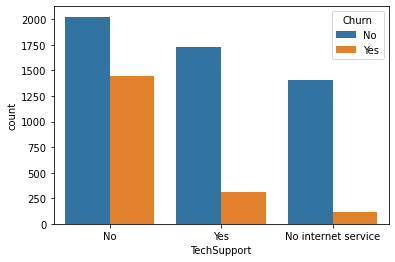

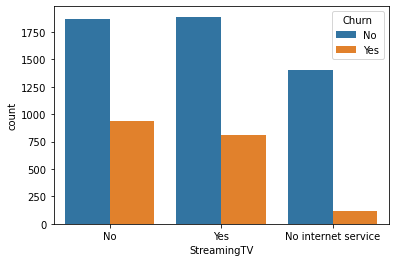

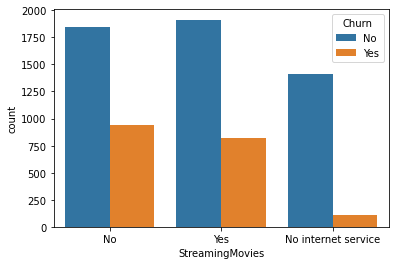

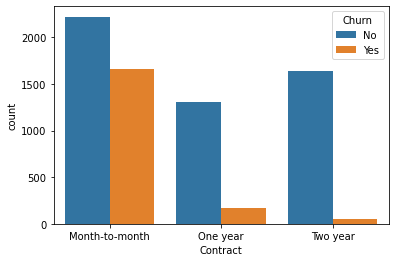

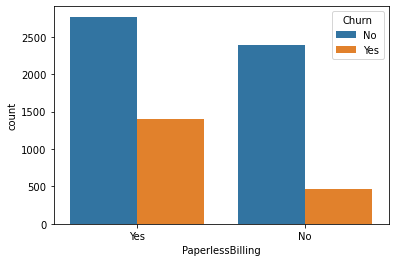

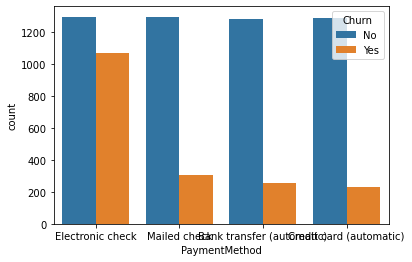

In [39]:
for i, predictor in enumerate(df.drop(columns=['Churn','MonthlyCharges','TotalCharges'])):
    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue= 'Churn')

CONCLUSIONS:

1. Female and male customer count balanced and Churn ratio also similar, this mean there's no majority gender on customer and one gender don't tend to Churn.

2. Senior citizen has more churn rate then customer who are not a senior citizen.

3. Customer who has dependents shows lower churn rate the customer who don't

4. Majority of customer have PhoneService, there's no significant churn ratio deferences between customer who have Phone Service or not

5. Out of 90,3% customer who have Phone Service, half of them used MultipleLines and others don't. There's also significant churn ratio differences between cutomer who used Multiple Lines and who don't.

6. Customer who used fiber optic shows more churn rate than the other two, with customer who didn't use internet service has the lowest churn rate.

7. Half of the customer don't used OnlineSecurity, and has the highest churn rate.

8. Half of customer has no tech support and 41,6% of customer with no tech support churned. this comparision is so big compared to customer with tech support with only 15,2& churn rate.

9. Month-to-month contract being a majority, and with the highest churn rate of 42,7% meanwhile one year contract has 11.3% churn rate and two year only 2,8% churn rate. 

10. This show loyal customer tend to make contract with longer period.

11. Majority user used paperless billing, but have slightly more churn rate too.

12. Yet being slightly larger count than other, electronic check has biggest churn rate of 45,3% while other has only under 20% churn rate.

### Let's see how the distribution of numerical column vary for 'Churn' and 'Not Churn'

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

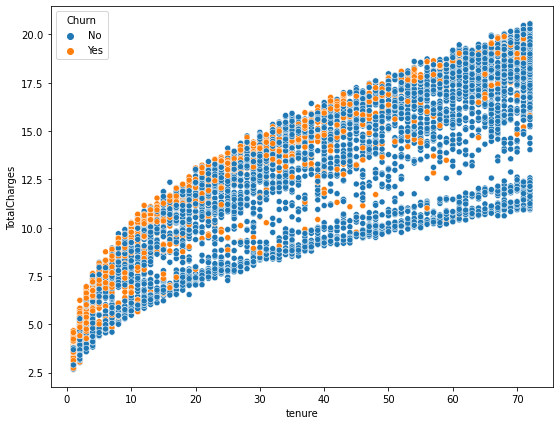

In [40]:
plt.figure(figsize =(9,7))
sns.scatterplot(x ="tenure",y = "TotalCharges", data = df, hue = "Churn")

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

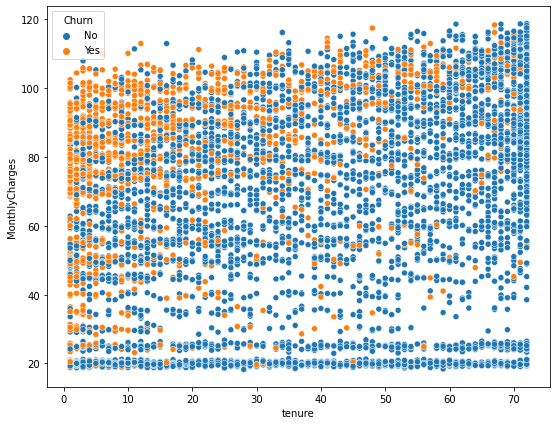

In [41]:
plt.figure(figsize =(9,7))
sns.scatterplot(x ="tenure",y = "MonthlyCharges", data = df, hue = "Churn")

There is no pattern in the tenure and monthly charges, churn count is more high between 65 to 105 monhtlycharges and below 20 tenure

In [42]:
# Since maximum columns are categorical, lets transform them with LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["Partner"] = le.fit_transform(df["Partner"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["PhoneService"] = le.fit_transform(df["PhoneService"])
df["MultipleLines"] = le.fit_transform(df["MultipleLines"])
df["InternetService"] = le.fit_transform(df["InternetService"])
df["OnlineSecurity"] = le.fit_transform(df["OnlineSecurity"])
df["DeviceProtection"] = le.fit_transform(df["DeviceProtection"])
df["TechSupport"] = le.fit_transform(df["TechSupport"])
df["StreamingTV"] = le.fit_transform(df["StreamingTV"])
df["StreamingMovies"] = le.fit_transform(df["StreamingMovies"])
df["Contract"] = le.fit_transform(df["Contract"])
df["OnlineBackup"] = le.fit_transform(df["OnlineBackup"])
df["PaperlessBilling"] = le.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"] = le.fit_transform(df["PaymentMethod"])
df["Churn"] = le.fit_transform(df["Churn"])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


### Checking the Correlation

In [44]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,-0.002023,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.106542,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.343854,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.084334,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.870422,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.088243,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.462389,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.207471,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.246230,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.351468,-0.195290


<AxesSubplot:>

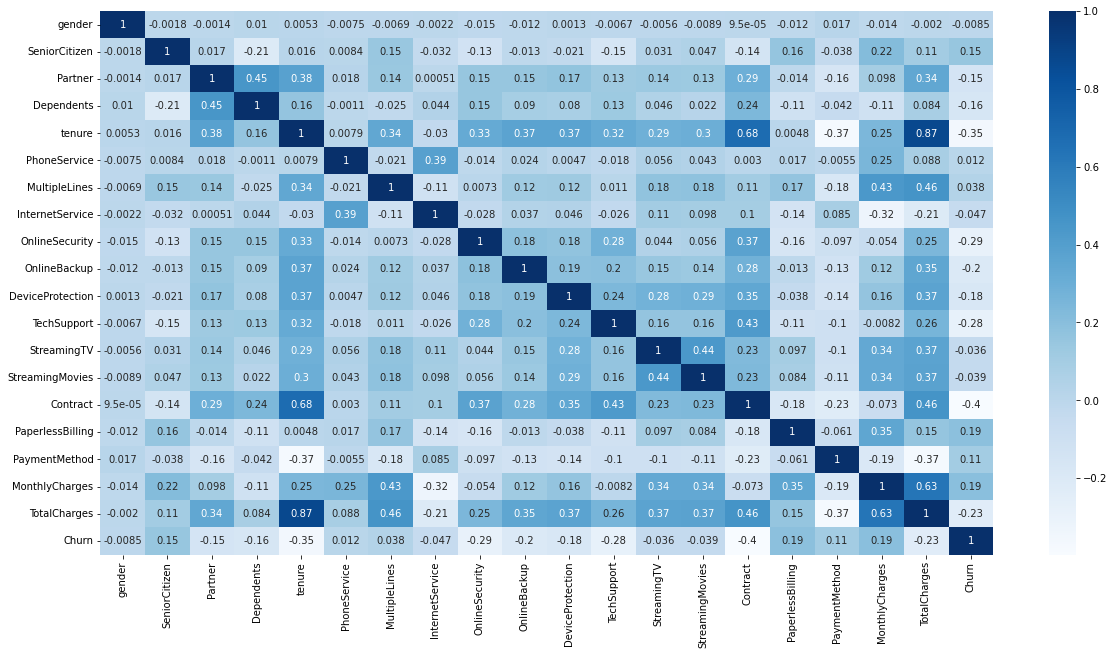

In [45]:
plt.figure(figsize =(20,10))
sns.heatmap(df.corr(),annot = True,  cmap ="Blues")

### To Check For Outliers

gender                 AxesSubplot(0.125,0.657941;0.0945122x0.222059)
SeniorCitizen       AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Partner             AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Dependents          AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
tenure              AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
PhoneService        AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
MultipleLines       AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
InternetService        AxesSubplot(0.125,0.391471;0.0945122x0.222059)
OnlineSecurity      AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
OnlineBackup        AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
DeviceProtection    AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
TechSupport         AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
StreamingTV         AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
StreamingMovies     AxesSubplot(0.805488,0.391471;0.0945122x0.222059)
Contract            

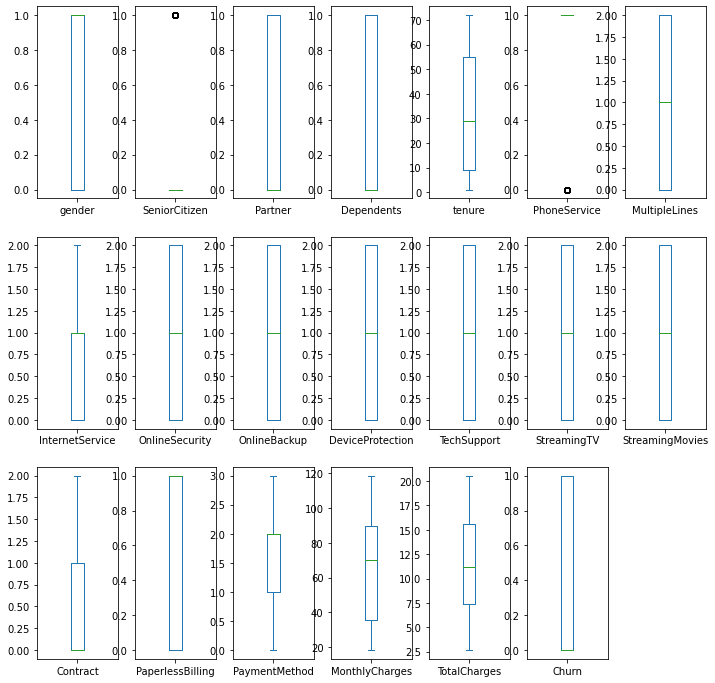

In [46]:
df.plot(kind='box',subplots=True,layout=(3,7),figsize=(12,12))

here we can see there are no outliers present in any of the numerical columns and the columns where outliers are showing , those are for binary output.

So we don,t need to remove outliers.

### Applying SMOTE to check Imbalance in Dataset

In [47]:
X = df.drop("Churn",axis = 1)
y = df["Churn"]

In [48]:
#Balancing data by applying SMOTE.
from imblearn.over_sampling import SMOTE
smt=SMOTE()
sm_x,sm_y=smt.fit_resample(X,y)
print(sm_x.shape)
print(sm_y.shape)

(10326, 19)
(10326,)


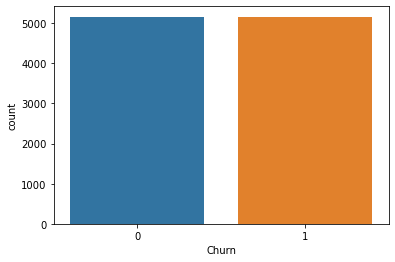

0    5163
1    5163
Name: Churn, dtype: int64


In [49]:
plt.figure(figsize=(6,4))
sns.countplot(sm_y)
plt.show()
print(sm_y.value_counts())

In [50]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
sm_x=scale.fit_transform(sm_x)
sm_x

array([[-0.88302385, -0.40951589,  1.26790211, ...,  0.43590015,
        -1.31662481, -1.54563341],
       [ 1.13247224, -0.40951589, -0.78870442, ...,  1.4361457 ,
        -0.37881247,  0.32681794],
       [ 1.13247224, -0.40951589, -0.78870442, ...,  1.4361457 ,
        -0.4860899 , -1.20951577],
       ...,
       [ 1.13247224,  2.44190766, -0.78870442, ...,  0.43590015,
         0.91581456, -0.89735153],
       [ 1.13247224, -0.40951589, -0.78870442, ..., -1.56459094,
        -0.78054997, -0.5579729 ],
       [-0.88302385, -0.40951589,  1.26790211, ...,  0.43590015,
         1.25255815,  1.70648046]])

In [51]:
sm_y

0        0
1        0
2        1
3        0
4        1
        ..
10321    1
10322    1
10323    1
10324    1
10325    1
Name: Churn, Length: 10326, dtype: int32

## Creating Model

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Finding Best Random State

In [53]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(sm_x,sm_y,random_state=i,test_size=0.20)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best score is',maxAcc,'on Random State',maxRS)

Best score is 0.8092933204259438 on Random State 130


In [54]:
x_train,x_test,y_train,y_test=train_test_split(sm_x,sm_y,test_size=.20,random_state=maxRS)

In [55]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(8260, 19) 	 (2066, 19)


In [56]:
print(y_train.shape,'\t',y_test.shape)

(8260,) 	 (2066,)


### Checking with different algorithms

In [57]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Train score",m.score(x_train,y_train))
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Train score 0.788498789346247
Accuracy score of LogisticRegression() is:
0.8092933204259438
[[784 202]
 [192 888]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       986
           1       0.81      0.82      0.82      1080

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



Train score 0.7778450363196125
Accuracy score of GaussianNB() is:
0.7884801548886737
[[727 259]
 [178 902]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       986
           1       0.78      0.84      0.80      1080

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



Train score 0.8435835351089589
Accuracy score of SVC() is:
0.829622458857696
[[792 194]
 [158 922]]
              preci

### Using Ensemble Technique to boostup score

In [58]:
# Checking accuracy for Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=101,criterion='gini')
rfc.fit(x_train,y_train)

# Prediction
predrfc = rfc.predict(x_test)
print("Train score",rfc.score(x_train,y_train))
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Train score 0.9983050847457627
0.8586640851887706
[[841 145]
 [147 933]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       986
           1       0.87      0.86      0.86      1080

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



In [59]:
# Checking accuracy for Gradient Boosting Classifier
GBc = GradientBoostingClassifier()
GBc.fit(x_train,y_train)

# Prediction
predGBc = GBc.predict(x_test)
print("Train score",GBc.score(x_train,y_train))
print(accuracy_score(y_test, predGBc))
print(confusion_matrix(y_test, predGBc))
print(classification_report(y_test,predGBc))

Train score 0.8312348668280871
0.8238141335914811
[[788 198]
 [166 914]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       986
           1       0.82      0.85      0.83      1080

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [61]:
# Checking accuracy for AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=100,random_state=101,base_estimator=SVC(),algorithm='SAMME',learning_rate=0.01)
adc.fit(x_train,y_train)
adc_pred=adc.predict(x_test)

print(accuracy_score(y_test,adc_pred))
print(confusion_matrix(y_test,adc_pred))
print(classification_report(y_test,adc_pred))

KeyboardInterrupt: 

## Cross Validation

In [62]:
best_parameter_GB = GradientBoostingClassifier(learning_rate=0.3, max_depth=10, n_estimators=400)

for i in range(2,7):
    cv = cross_val_score(GBc,sm_x,sm_y,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.7930466782878172 and the SD is 0.03166763509587445
at CV 3 The mean is  0.8019562269998063 and the SD is 0.04960267554115322
at CV 4 The mean is  0.8105822549999685 and the SD is 0.04184652424998232
at CV 5 The mean is  0.8099999765604308 and the SD is 0.04320497945565575
at CV 6 The mean is  0.8132868487313577 and the SD is 0.046112283246764633


In [63]:
# Cross validate of GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(GBc,sm_x,sm_y,cv=6,scoring='accuracy',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Score: [0.75479372 0.74375363 0.83439861 0.83846601 0.84776293 0.86054619]
Mean Score: 0.8132868487313577
Standard Deviation: 0.046112283246764633


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.5s finished


### Hyperparameter Tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {"n_estimators":[100,200,300,400],
        "learning_rate":[0.1,0.3,0.5],
        "max_depth" :[3,5,7,9,10]}

grid = RandomizedSearchCV(GBc, para, scoring= "accuracy",cv = 5, n_iter=50,n_jobs=-1,verbose=2)

grid.fit(x_train,y_train)
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x_test) # predicting with best parameters

Fitting 5 folds for each of 50 candidates, totalling 250 fits
score 0.8462469733656175
best parameter {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1}
best estimator GradientBoostingClassifier(max_depth=10, n_estimators=300)


In [65]:
Churn = GradientBoostingClassifier(learning_rate=0.3, max_depth=10, n_estimators=400)
Churn.fit(x_train, y_train)
pred = Churn.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.2536302032914


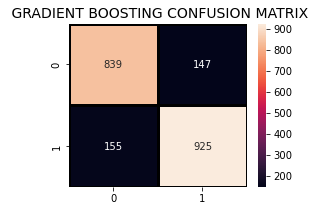

In [66]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, grid_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" GRADIENT BOOSTING CONFUSION MATRIX",fontsize=14)
plt.show()

## AUC ROC Curve

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [68]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [3, 5, 7, 9, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='accuracy', verbose=2)

In [69]:
y_pred_prob=grid.predict_proba(x_test)[:,1]
y_pred_prob

array([9.61643139e-01, 9.60528600e-01, 9.65637341e-01, ...,
       9.99992875e-01, 1.96358576e-01, 8.55484226e-04])

In [70]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [71]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.0010142 , 0.0010142 ,
        0.0010142 , 0.0010142 , 0.0020284 , 0.0020284 , 0.0020284 ,
        0.0020284 , 0.0020284 , 0.0020284 , 0.0020284 , 0.0020284 ,
        0.0040568 , 0.0040568 , 0.00507099, 0.00507099, 0.00608519,
        0.00608519, 0.00709939, 0.00709939, 0.00811359, 0.00811359,
        0.00811359, 0.00811359, 0.00912779, 0.00912779, 0.01014199,
        0.01014199, 0.01115619, 0.01115619, 0.01115619, 0.01115619,
        0.01217039, 0.01217039, 0.01217039, 0.01217039, 0.01318458,
        0.01318458, 0.01419878, 0.01419878, 0.01521298, 0.01521298,
        0.01622718, 0.01622718, 0.01622718, 0.01825558, 0.01825558,
        0.01926978, 0.01926978, 0.02028398, 0.02028398, 0.02129817,
        0.02129817, 0.02231237, 0.02231237, 0.02332657, 0.02332657,
        0.02434077, 0.02434077, 0.02535497, 0.02535497, 0.02535497,
        0.02535497, 0.02636917, 0.02636917, 0.02738337, 0.02738337,
        0.02839757, 0.02839757, 0.02941176, 0.02

In [72]:
auc_score=roc_auc_score(y_test,grid.predict(x_test))
print(auc_score)

0.8638607167004734


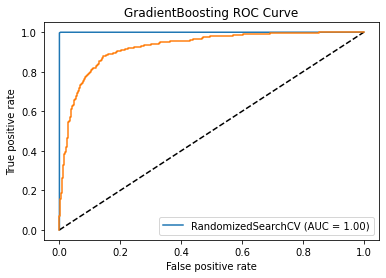

In [73]:
plot_roc_curve(grid,x_train,y_train)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting ROC Curve')
plt.show()

## Model Saving

In [74]:
import pickle
filename='Predicted_Churn.pkl'
pickle.dump(GBc,open(filename,'wb'))